<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [1]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn  as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
ind = np.random.randint(1, 9245527, 5000000)

In [7]:
df_std = df.iloc[ind,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
8389849,2.0,6647000.0,0.0,OTROS,UNIVERSITARIO,Empleado,6,UNION LIBRE,B,F,...,8,202007,0,0.0,7,174898000.0,1991752.0,LORICA,65,458165.00
4803237,1.0,2427694.0,0.0,ADMINISTRACION,TECNOLOGO,Empleado,6,UNION LIBRE,E,F,...,0,201909,0,0.0,9,364000.0,0.0,PUERRES,41,900580.29
9043264,3.0,15796000.0,12159980.0,OTROS,ESPECIALIZACION,Empleado,6,CASADO,B,M,...,9,201902,1,31200000.0,2,256000.0,0.0,PEDRAZA,36,2691772.00
2231596,1.0,1656232.0,0.0,ADMINISTRACION,BACHILLER,Empleado,6,SOLTERO,E,M,...,2,202005,0,0.0,5,54756000.0,0.0,PEDRAZA,57,50000.00
1573890,1.0,2893738.0,3377360.0,CONTADURIA,UNIVERSITARIO,Empleado,6,SOLTERO,H,F,...,2,201904,0,0.0,4,36780000.0,0.0,NECOCLI,43,348888.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970331,1.0,3173457.0,4038880.0,EDUCACION,UNIVERSITARIO,Empleado,6,SOLTERO,B,F,...,1,201909,1,10000000.0,9,0.0,0.0,PEDRAZA,34,155058.00
6234178,2.0,13078756.0,0.0,OTROS,ESPECIALIZACION,Empleado,6,SOLTERO,C,M,...,1,201903,0,0.0,3,0.0,0.0,PEDRAZA,39,863480.00
2520034,2.0,17227377.0,0.0,PILOTOS,UNIVERSITARIO,Empleado,6,SOLTERO,G,M,...,13,202005,1,4600000.0,5,400372000.0,0.0,LORICA,41,1988443.00
1782520,1.0,2178432.0,1333432.0,OTROS,TECNOLOGO,Empleado,6,DIVORCIADO,F,M,...,0,202001,0,0.0,1,0.0,0.0,ARBOLEDAS,34,898873.00


## One-Hot Encoding

In [8]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [9]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YARIMA,ciudad_residencia_YARUMAL,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
8389849,2.0,6647000.0,0.0,6,1,1,7,1,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4803237,1.0,2427694.0,0.0,6,1,1,4,1,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
9043264,3.0,15796000.0,12159980.0,6,1,1,7,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2231596,1.0,1656232.0,0.0,6,1,1,4,2,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1573890,1.0,2893738.0,3377360.0,6,1,1,1,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970331,1.0,3173457.0,4038880.0,6,1,1,7,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
6234178,2.0,13078756.0,0.0,6,1,1,5,2,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2520034,2.0,17227377.0,0.0,6,1,1,2,2,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1782520,1.0,2178432.0,1333432.0,6,1,1,6,2,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    7701094
dtype: int64

## Best Variables

In [11]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:7]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar']

In [12]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
                     'gasto_familiar']

In [13]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,gasto_familiar
8389849,2.0,6647000.0,0.0,6,1,1,7,458165.00
4803237,1.0,2427694.0,0.0,6,1,1,4,900580.29
9043264,3.0,15796000.0,12159980.0,6,1,1,7,2691772.00
2231596,1.0,1656232.0,0.0,6,1,1,4,50000.00
1573890,1.0,2893738.0,3377360.0,6,1,1,1,348888.00
...,...,...,...,...,...,...,...,...
6970331,1.0,3173457.0,4038880.0,6,1,1,7,155058.00
6234178,2.0,13078756.0,0.0,6,1,1,5,863480.00
2520034,2.0,17227377.0,0.0,6,1,1,2,1988443.00
1782520,1.0,2178432.0,1333432.0,6,1,1,6,898873.00


## Normalization

In [14]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,5000000.0,0.30,0.13,0.0,0.20,0.20,0.40,1.0
1,5000000.0,0.01,0.02,0.0,0.00,0.01,0.01,1.0
2,5000000.0,0.00,0.01,0.0,0.00,0.00,0.00,1.0
3,5000000.0,0.53,0.18,0.0,0.56,0.56,0.56,1.0
4,5000000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,5000000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,5000000.0,0.60,0.36,0.0,0.29,0.57,1.00,1.0
7,5000000.0,0.02,0.00,0.0,0.02,0.02,0.02,1.0


In [15]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [16]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 7)
(281666,)
(4718334,)


## Train_Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6
3753681,0.2,0.016161,0.000000,0.555556,0.0,0.0,1.000000
4102910,0.2,0.003589,0.000000,0.444444,0.0,0.0,0.714286
2999199,0.2,0.009208,0.000000,0.777778,0.0,0.0,0.142857
3874706,0.2,0.008570,0.000000,1.000000,0.0,0.0,1.000000
869517,0.2,0.003024,0.002746,0.777778,0.0,0.0,0.571429
...,...,...,...,...,...,...,...
4254737,0.2,0.007341,0.000000,0.333333,0.0,0.0,0.571429
607790,0.4,0.014692,0.000000,0.555556,0.0,0.0,1.000000
1111071,0.4,0.041651,0.000000,0.555556,0.0,0.0,0.142857
2358825,0.2,0.002980,0.002651,0.555556,0.0,0.0,0.142857


In [18]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [19]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(16, input_dim=7, kernel_initializer='normal',activation='linear'))
model.add(Dense(8, kernel_initializer='normal',activation='linear'))
model.add(Dense(4, kernel_initializer='normal',activation='linear'))
model.add(Dense(2, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 4,903
Trainable params: 4,903
Non-trainable params: 0
______________________________________________________

In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [22]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [23]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

44235/44235 [==============================] - 32s 731us/step - loss: 6.1704e-06 - mean_absolute_percentage_error: 5.6315
loss :  6.170443612063536e-06
mean_absolute_percentage_error :  5.631470203399658


## Submission

In [24]:
y_hat = model.predict(x_val)
y_hat

array([[0.01714037],
       [0.01688541],
       [0.0169539 ],
       ...,
       [0.0180353 ],
       [0.01695111],
       [0.0175894 ]], dtype=float32)

In [25]:
y_val

array([0.01655372, 0.01730917, 0.01679113, ..., 0.01932318, 0.01745809,
       0.01642583])

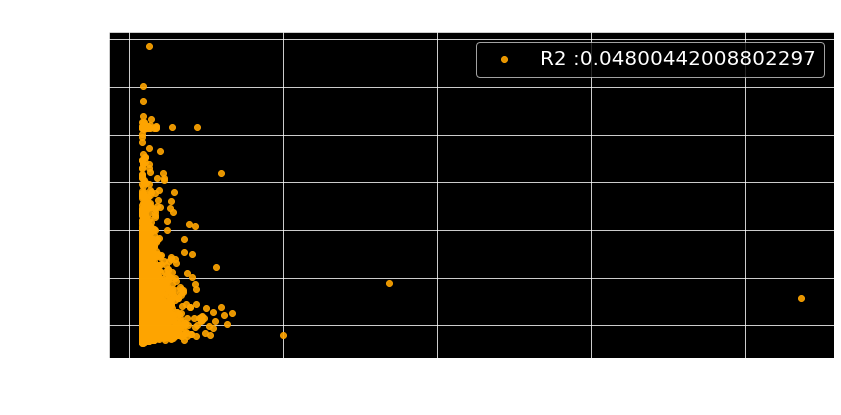

In [26]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 0 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right'
           )
plt.show()

In [27]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.006472,0.015922,0.555556,0.0,0.0,0.857143,0.017140
1,0.2,0.004188,0.000000,0.555556,0.0,0.0,0.571429,0.016885
2,0.2,0.006031,0.003578,0.555556,0.0,0.0,0.285714,0.016954
3,0.4,0.015160,0.000000,0.555556,0.0,0.0,0.857143,0.017503
4,0.2,0.011175,0.000000,0.555556,0.0,0.0,0.857143,0.017046
...,...,...,...,...,...,...,...,...
281661,0.2,0.007771,0.008686,0.555556,0.0,0.0,0.857143,0.017080
281662,0.4,0.032025,0.000000,0.555556,0.0,0.0,0.571429,0.017843
281663,0.4,0.042183,0.000000,0.555556,0.0,0.0,0.142857,0.018035
281664,0.2,0.005334,0.002868,0.555556,0.0,0.0,0.714286,0.016951


In [28]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.132678e+05
1         5.643229e+05
2         6.043317e+05
3         9.248897e+05
4         6.579107e+05
              ...     
281661    6.778292e+05
281662    1.123562e+06
281663    1.236076e+06
281664    6.027038e+05
281665    9.755852e+05
Name: 7, Length: 281666, dtype: float64

In [29]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.132678e+05
1,12598#201902,5.643229e+05
2,23697#201902,6.043317e+05
3,23768#201902,9.248897e+05
4,7174#201902,6.579107e+05
...,...,...
281661,8596193#202011,6.778292e+05
281662,8616083#202011,1.123562e+06
281663,8670207#202011,1.236076e+06
281664,8677655#202011,6.027038e+05


In [30]:
n = 100
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN100.csv'

In [31]:
np.mean(sub['gasto_familiar'])

778604.4092190389

In [32]:
sub.to_csv(sub_name, index=False)

# Test 1

In [33]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

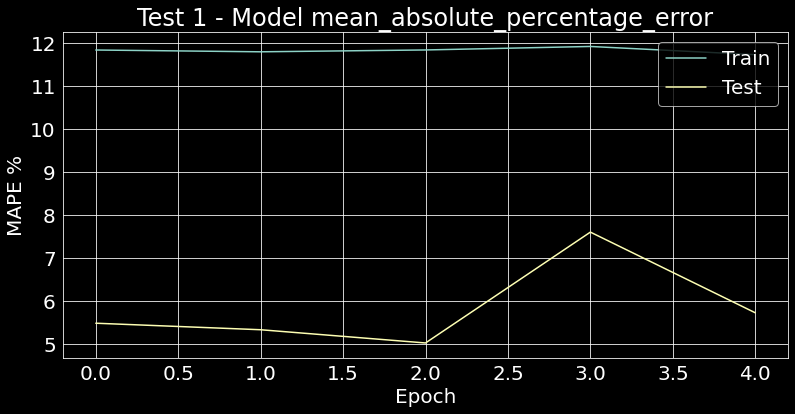

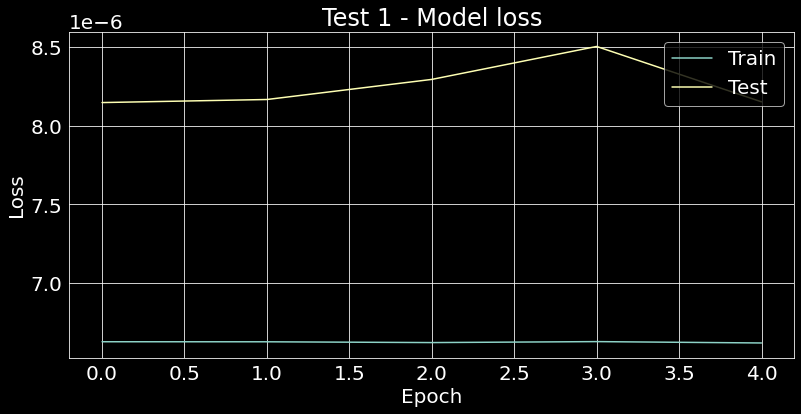

In [34]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 1 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 1 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

44235/44235 [==============================] - 32s 730us/step - loss: 6.1669e-06 - mean_absolute_percentage_error: 5.7227
loss :  6.1668943089898676e-06
mean_absolute_percentage_error :  5.7226715087890625


# Submission

In [36]:
y_hat = model.predict(x_val)
y_hat

array([[0.01714314],
       [0.0168825 ],
       [0.01695842],
       ...,
       [0.01812575],
       [0.01694795],
       [0.01767093]], dtype=float32)

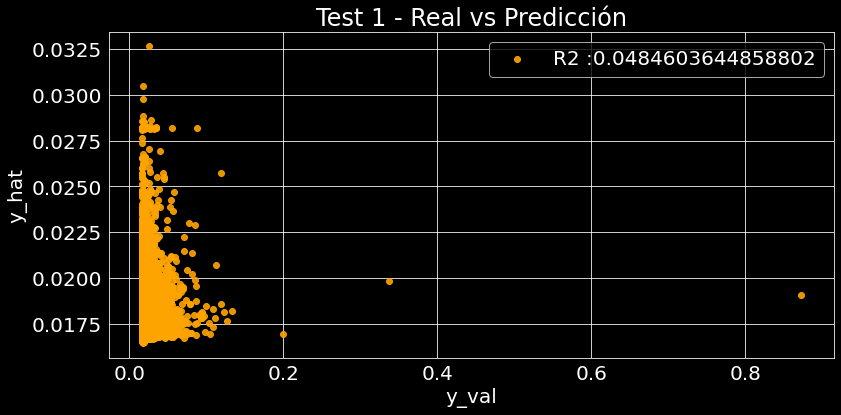

In [37]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 1 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [38]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.006472,0.015922,0.555556,0.0,0.0,0.857143,0.017143
1,0.2,0.004188,0.000000,0.555556,0.0,0.0,0.571429,0.016882
2,0.2,0.006031,0.003578,0.555556,0.0,0.0,0.285714,0.016958
3,0.4,0.015160,0.000000,0.555556,0.0,0.0,0.857143,0.017573
4,0.2,0.011175,0.000000,0.555556,0.0,0.0,0.857143,0.017040
...,...,...,...,...,...,...,...,...
281661,0.2,0.007771,0.008686,0.555556,0.0,0.0,0.857143,0.017078
281662,0.4,0.032025,0.000000,0.555556,0.0,0.0,0.571429,0.017923
281663,0.4,0.042183,0.000000,0.555556,0.0,0.0,0.142857,0.018126
281664,0.2,0.005334,0.002868,0.555556,0.0,0.0,0.714286,0.016948


In [39]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.148837e+05
1         5.626189e+05
2         6.069705e+05
3         9.659529e+05
4         6.547410e+05
              ...     
281661    6.771175e+05
281662    1.170440e+06
281663    1.288915e+06
281664    6.008551e+05
281665    1.023214e+06
Name: 7, Length: 281666, dtype: float64

In [40]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.148837e+05
1,12598#201902,5.626189e+05
2,23697#201902,6.069705e+05
3,23768#201902,9.659529e+05
4,7174#201902,6.547410e+05
...,...,...
281661,8596193#202011,6.771175e+05
281662,8616083#202011,1.170440e+06
281663,8670207#202011,1.288915e+06
281664,8677655#202011,6.008551e+05


In [41]:
n = 101
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN101.csv'

In [42]:
np.mean(sub['gasto_familiar'])

800358.3171178909

In [43]:
sub.to_csv(sub_name, index=False)

# Test 2

In [44]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


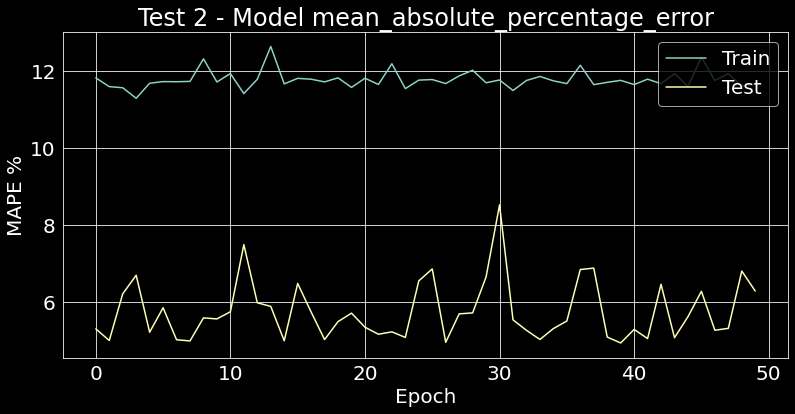

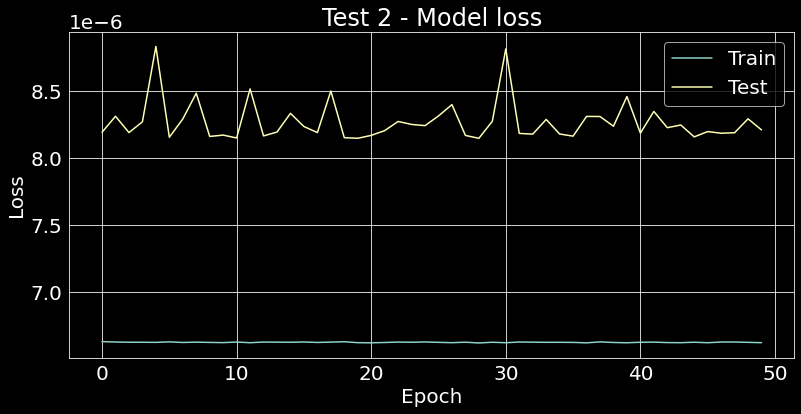

In [45]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [46]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

44235/44235 [==============================] - 32s 714us/step - loss: 6.2227e-06 - mean_absolute_percentage_error: 6.2799
loss :  6.2227450143836904e-06
mean_absolute_percentage_error :  6.279879570007324


# Submission

In [47]:
y_hat = model.predict(x_val)
y_hat

array([[0.01738456],
       [0.01712037],
       [0.01719823],
       ...,
       [0.01826108],
       [0.01718627],
       [0.01780542]], dtype=float32)

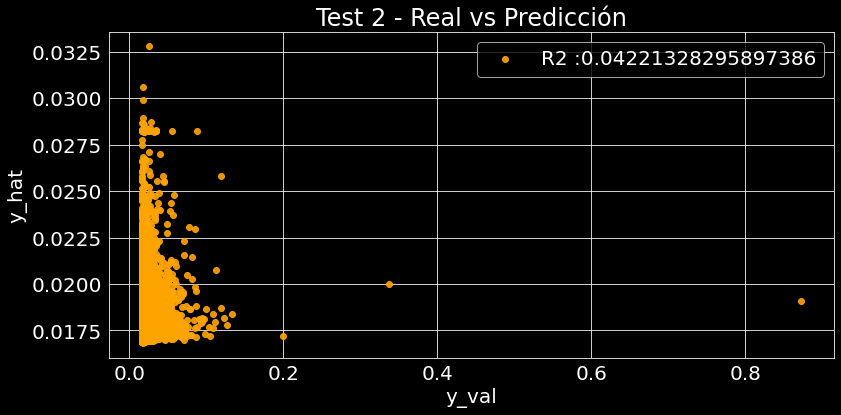

In [48]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 2 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [49]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.006472,0.015922,0.555556,0.0,0.0,0.857143,0.017385
1,0.2,0.004188,0.000000,0.555556,0.0,0.0,0.571429,0.017120
2,0.2,0.006031,0.003578,0.555556,0.0,0.0,0.285714,0.017198
3,0.4,0.015160,0.000000,0.555556,0.0,0.0,0.857143,0.017704
4,0.2,0.011175,0.000000,0.555556,0.0,0.0,0.857143,0.017278
...,...,...,...,...,...,...,...,...
281661,0.2,0.007771,0.008686,0.555556,0.0,0.0,0.857143,0.017318
281662,0.4,0.032025,0.000000,0.555556,0.0,0.0,0.571429,0.018056
281663,0.4,0.042183,0.000000,0.555556,0.0,0.0,0.142857,0.018261
281664,0.2,0.005334,0.002868,0.555556,0.0,0.0,0.714286,0.017186


In [50]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         8.559200e+05
1         7.015833e+05
2         7.470666e+05
3         1.042337e+06
4         7.935999e+05
              ...     
281661    8.171190e+05
281662    1.248221e+06
281663    1.367973e+06
281664    7.400785e+05
281665    1.101781e+06
Name: 7, Length: 281666, dtype: float64

In [51]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,8.559200e+05
1,12598#201902,7.015833e+05
2,23697#201902,7.470666e+05
3,23768#201902,1.042337e+06
4,7174#201902,7.935999e+05
...,...,...
281661,8596193#202011,8.171190e+05
281662,8616083#202011,1.248221e+06
281663,8670207#202011,1.367973e+06
281664,8677655#202011,7.400785e+05


In [52]:
n = 102
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN102.csv'

In [53]:
np.mean(sub['gasto_familiar'])

909746.5900251855

In [54]:
sub.to_csv(sub_name, index=False)

# Test 3

In [55]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


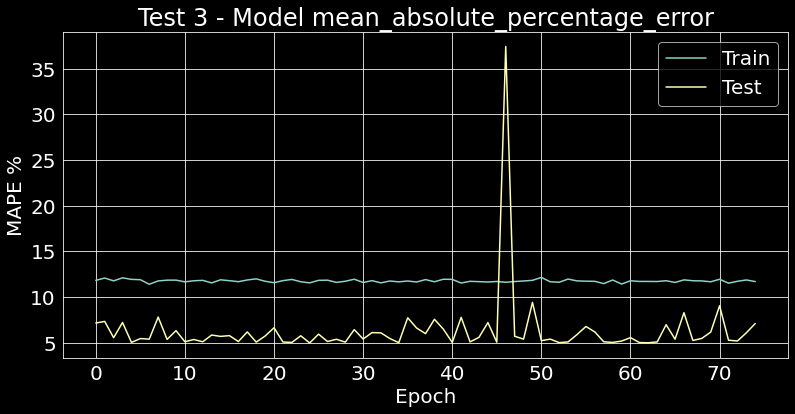

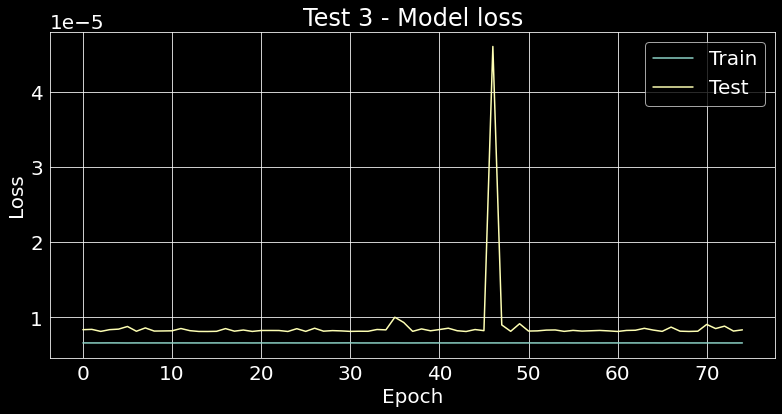

In [56]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [57]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

44235/44235 [==============================] - 32s 714us/step - loss: 6.3777e-06 - mean_absolute_percentage_error: 7.0968
loss :  6.3777065406611655e-06
mean_absolute_percentage_error :  7.096795558929443


## Submission

In [58]:
y_hat = model.predict(x_val)
y_hat

array([[0.01763846],
       [0.01732777],
       [0.01740814],
       ...,
       [0.0185736 ],
       [0.01740714],
       [0.01807367]], dtype=float32)

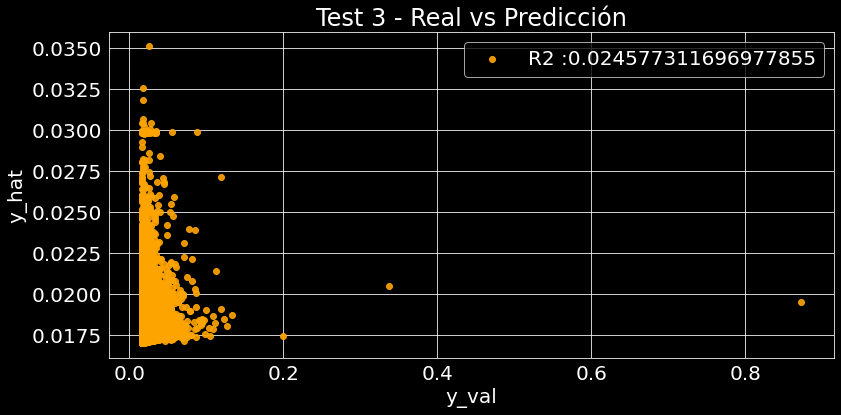

In [59]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 3 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [60]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.006472,0.015922,0.555556,0.0,0.0,0.857143,0.017638
1,0.2,0.004188,0.000000,0.555556,0.0,0.0,0.571429,0.017328
2,0.2,0.006031,0.003578,0.555556,0.0,0.0,0.285714,0.017408
3,0.4,0.015160,0.000000,0.555556,0.0,0.0,0.857143,0.017964
4,0.2,0.011175,0.000000,0.555556,0.0,0.0,0.857143,0.017514
...,...,...,...,...,...,...,...,...
281661,0.2,0.007771,0.008686,0.555556,0.0,0.0,0.857143,0.017562
281662,0.4,0.032025,0.000000,0.555556,0.0,0.0,0.571429,0.018354
281663,0.4,0.042183,0.000000,0.555556,0.0,0.0,0.142857,0.018574
281664,0.2,0.005334,0.002868,0.555556,0.0,0.0,0.714286,0.017407


In [61]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.004246e+06
1         8.227458e+05
2         8.696959e+05
3         1.194690e+06
4         9.317320e+05
              ...     
281661    9.594426e+05
281662    1.422550e+06
281663    1.550549e+06
281664    8.691115e+05
281665    1.258491e+06
Name: 7, Length: 281666, dtype: float64

In [62]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.004246e+06
1,12598#201902,8.227458e+05
2,23697#201902,8.696959e+05
3,23768#201902,1.194690e+06
4,7174#201902,9.317320e+05
...,...,...
281661,8596193#202011,9.594426e+05
281662,8616083#202011,1.422550e+06
281663,8670207#202011,1.550549e+06
281664,8677655#202011,8.691115e+05


In [63]:
n = 103
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN103.csv'

In [64]:
np.mean(sub['gasto_familiar'])

1050128.2979662851

In [65]:
sub.to_csv(sub_name, index=False)

# Test 4

In [66]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


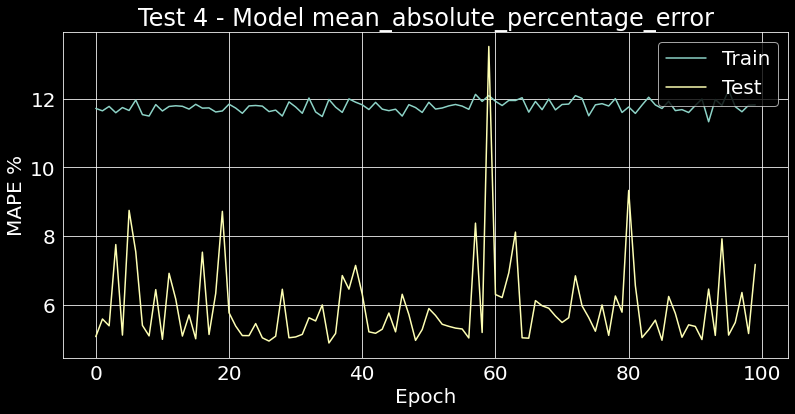

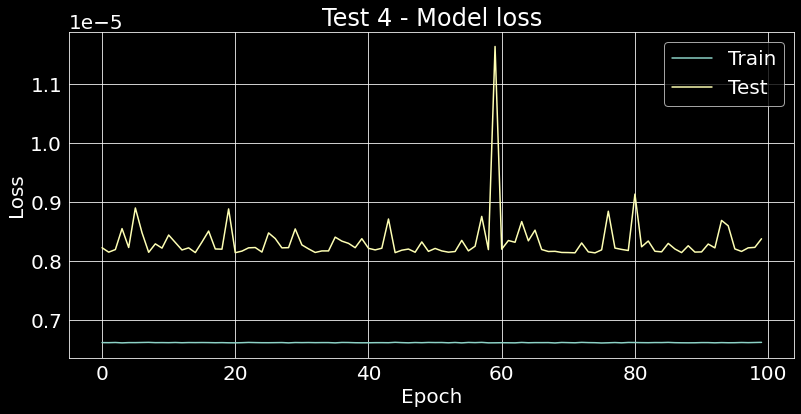

In [67]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [68]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

44235/44235 [==============================] - 31s 711us/step - loss: 6.4022e-06 - mean_absolute_percentage_error: 7.1909
loss :  6.40221423964249e-06
mean_absolute_percentage_error :  7.190895080566406


## Submission

In [69]:
y_hat = model.predict(x_val)
y_hat

array([[0.01765913],
       [0.01732133],
       [0.01742253],
       ...,
       [0.01871949],
       [0.01740513],
       [0.01813665]], dtype=float32)

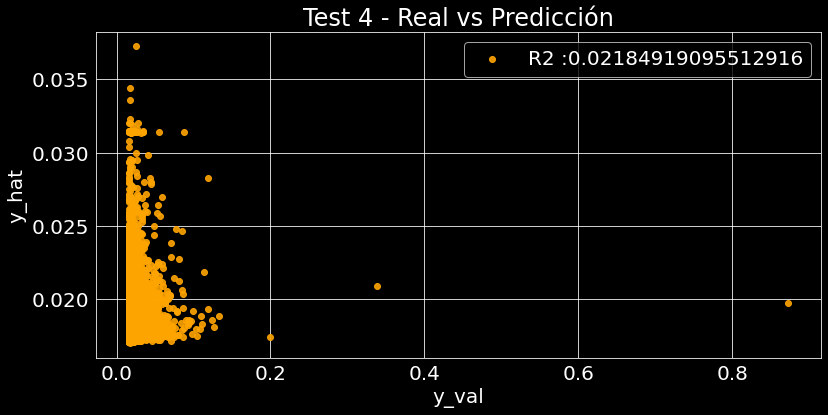

In [70]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 4 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [71]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.006472,0.015922,0.555556,0.0,0.0,0.857143,0.017659
1,0.2,0.004188,0.000000,0.555556,0.0,0.0,0.571429,0.017321
2,0.2,0.006031,0.003578,0.555556,0.0,0.0,0.285714,0.017423
3,0.4,0.015160,0.000000,0.555556,0.0,0.0,0.857143,0.018004
4,0.2,0.011175,0.000000,0.555556,0.0,0.0,0.857143,0.017521
...,...,...,...,...,...,...,...,...
281661,0.2,0.007771,0.008686,0.555556,0.0,0.0,0.857143,0.017574
281662,0.4,0.032025,0.000000,0.555556,0.0,0.0,0.571429,0.018456
281663,0.4,0.042183,0.000000,0.555556,0.0,0.0,0.142857,0.018719
281664,0.2,0.005334,0.002868,0.555556,0.0,0.0,0.714286,0.017405


In [72]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.016321e+06
1         8.189830e+05
2         8.781029e+05
3         1.217815e+06
4         9.357265e+05
              ...     
281661    9.663077e+05
281662    1.481609e+06
281663    1.635777e+06
281664    8.679342e+05
281665    1.295284e+06
Name: 7, Length: 281666, dtype: float64

In [73]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.016321e+06
1,12598#201902,8.189830e+05
2,23697#201902,8.781029e+05
3,23768#201902,1.217815e+06
4,7174#201902,9.357265e+05
...,...,...
281661,8596193#202011,9.663077e+05
281662,8616083#202011,1.481609e+06
281663,8670207#202011,1.635777e+06
281664,8677655#202011,8.679342e+05


In [74]:
n = 104
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN104.csv'

In [75]:
np.mean(sub['gasto_familiar'])

1067979.2931451194

In [76]:
sub.to_csv(sub_name, index=False)

# Test 5

In [77]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



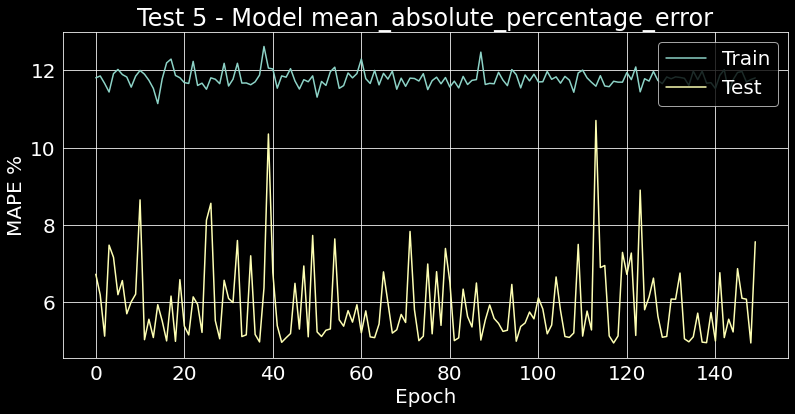

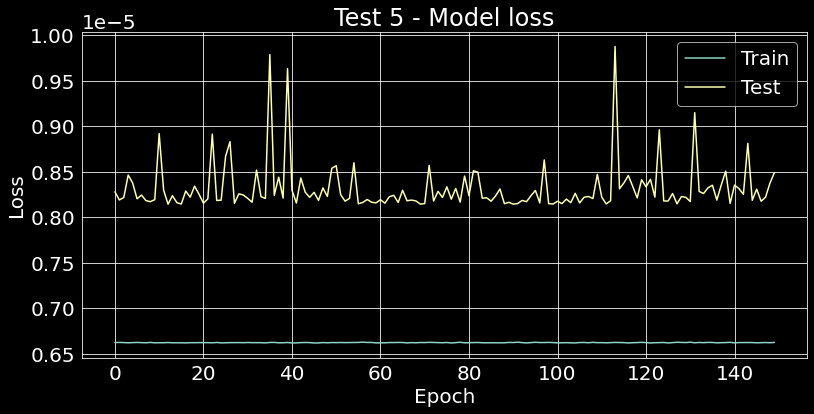

In [78]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [79]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

44235/44235 [==============================] - 32s 712us/step - loss: 6.5096e-06 - mean_absolute_percentage_error: 7.5709
loss :  6.509599188575521e-06
mean_absolute_percentage_error :  7.570949554443359


# Submission

In [80]:
y_hat = model.predict(x_val)
y_hat

array([[0.01774891],
       [0.01745677],
       [0.01752528],
       ...,
       [0.01864105],
       [0.01753273],
       [0.01818945]], dtype=float32)

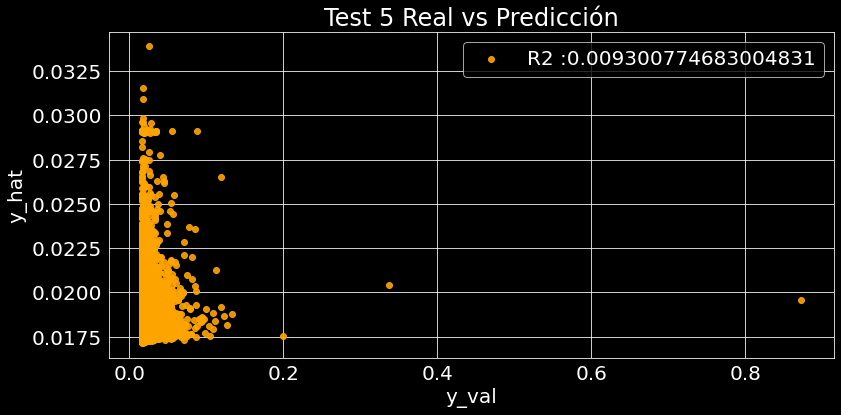

In [81]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 5 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [82]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.006472,0.015922,0.555556,0.0,0.0,0.857143,0.017749
1,0.2,0.004188,0.000000,0.555556,0.0,0.0,0.571429,0.017457
2,0.2,0.006031,0.003578,0.555556,0.0,0.0,0.285714,0.017525
3,0.4,0.015160,0.000000,0.555556,0.0,0.0,0.857143,0.018094
4,0.2,0.011175,0.000000,0.555556,0.0,0.0,0.857143,0.017634
...,...,...,...,...,...,...,...,...
281661,0.2,0.007771,0.008686,0.555556,0.0,0.0,0.857143,0.017678
281662,0.4,0.032025,0.000000,0.555556,0.0,0.0,0.571429,0.018448
281663,0.4,0.042183,0.000000,0.555556,0.0,0.0,0.142857,0.018641
281664,0.2,0.005334,0.002868,0.555556,0.0,0.0,0.714286,0.017533


In [83]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.068769e+06
1         8.981051e+05
2         9.381281e+05
3         1.270452e+06
4         1.001729e+06
              ...     
281661    1.027392e+06
281662    1.476998e+06
281663    1.589954e+06
281664    9.424817e+05
281665    1.326132e+06
Name: 7, Length: 281666, dtype: float64

In [84]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.068769e+06
1,12598#201902,8.981051e+05
2,23697#201902,9.381281e+05
3,23768#201902,1.270452e+06
4,7174#201902,1.001729e+06
...,...,...
281661,8596193#202011,1.027392e+06
281662,8616083#202011,1.476998e+06
281663,8670207#202011,1.589954e+06
281664,8677655#202011,9.424817e+05


In [85]:
n = 105
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN105.csv'

In [86]:
np.mean(sub['gasto_familiar'])

1120943.1393180923

In [87]:
sub.to_csv(sub_name, index=False)